In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-credit-approval/crx.csv


In [147]:
df = pd.read_csv('../input/uci-credit-approval/crx.csv', header=None)

In [148]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [149]:
# adding headers
df.columns =['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 
               'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14',
              'A15', 'A16']

In [150]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [151]:
#replace nan-value
df = df.replace(to_replace='?',value=np.nan)

In [152]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [153]:
df.nunique()

A1       2
A2     349
A3     215
A4       3
A5       3
A6      14
A7       9
A8     132
A9       2
A10      2
A11     23
A12      2
A13      3
A14    170
A15    240
A16      2
dtype: int64

In [154]:
#convert number value which were object
df['A2'] = pd.to_numeric(df['A2'], errors='coerce')
df['A15'].astype('float')

0        0.0
1      560.0
2      824.0
3        3.0
4        0.0
       ...  
685      0.0
686    394.0
687      1.0
688    750.0
689      0.0
Name: A15, Length: 690, dtype: float64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


In [156]:
# get rid of nan
df2=df.dropna()
df2=df.dropna(axis=0)

In [185]:
#Now we convert our 'a' and 'b' to a numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df2[col].dtypes=='object':
        df2[col]=le.fit_transform(df2[col])

In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    int64  
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    int64  
 4   A5      653 non-null    int64  
 5   A6      653 non-null    int64  
 6   A7      653 non-null    int64  
 7   A8      653 non-null    float64
 8   A9      653 non-null    int64  
 9   A10     653 non-null    int64  
 10  A11     653 non-null    int64  
 11  A12     653 non-null    int64  
 12  A13     653 non-null    int64  
 13  A14     653 non-null    int64  
 14  A15     653 non-null    int64  
 15  A16     653 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.7 KB


In [159]:
df2.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.689127,31.503813,4.829533,1.229709,0.468606,5.773354,5.084227,2.244296,0.534456,0.439510,2.502297,0.462481,0.165391,52.379786,1013.761103,0.546708
std,0.463206,11.838267,5.027077,0.428193,0.845963,4.296249,2.494278,3.371120,0.499194,0.496708,4.968497,0.498973,0.548475,51.265097,5253.278504,0.498195
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.040000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,1.000000,28.420000,2.835000,1.000000,0.000000,6.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,5.000000,1.000000
75%,1.000000,38.250000,7.500000,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.000000,1.000000,0.000000,87.000000,400.000000,1.000000
max,1.000000,76.750000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,163.000000,100000.000000,1.000000


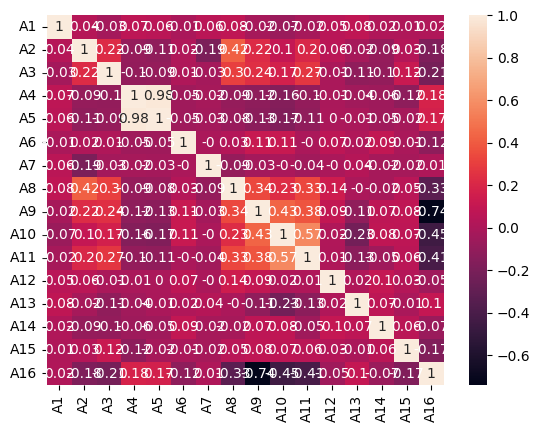

In [160]:
correlation_matrix = df2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [184]:
X = pd.get_dummies(df2.drop('A16', axis=1))
y = df2['A16']

In [162]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: A16, dtype: int64

In [163]:
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,41,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,113,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,71,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,1,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,7,0,0


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you already have your feature matrix X and target variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier


In [165]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.83


Random Forest Confusion Matrix:
[[45 14]
 [ 8 64]]


<Figure size 800x600 with 0 Axes>

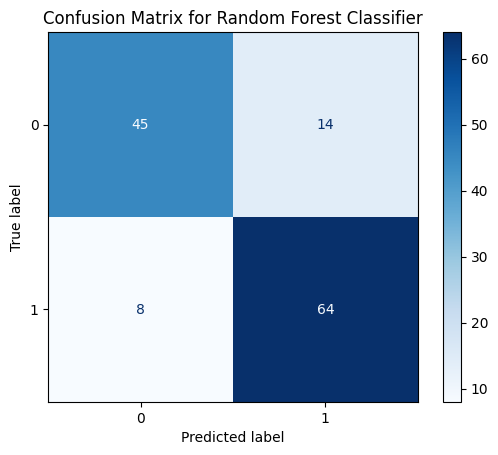

In [166]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Random Forest Confusion Matrix:')
print(cm_rf)

# Plot Confusion Matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
plt.figure(figsize=(8, 6))
disp_rf.plot(cmap=plt.cm.Blues, values_format='d', include_values=True, xticks_rotation='horizontal')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

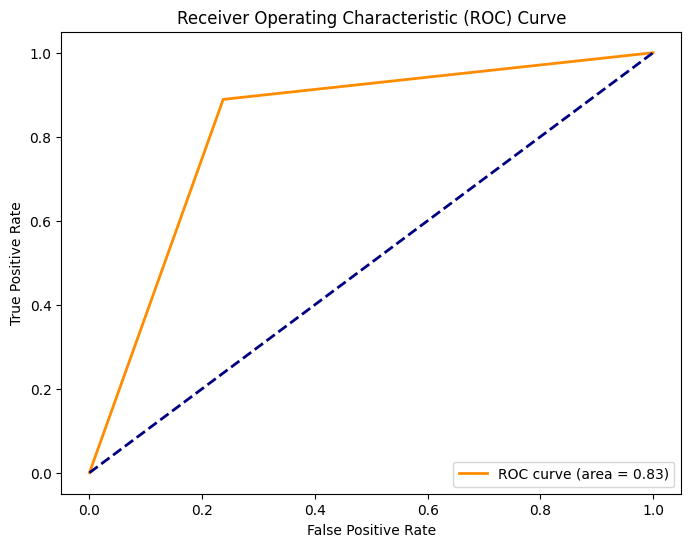

In [167]:
# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**XG BOOST**

Accuracy: 0.86
XGBoost Confusion Matrix:
[[47 12]
 [ 6 66]]


<Figure size 800x600 with 0 Axes>

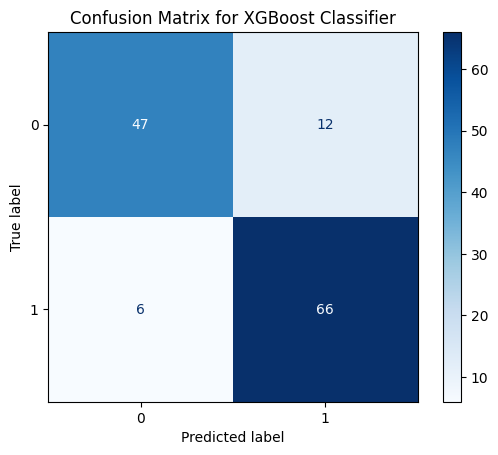

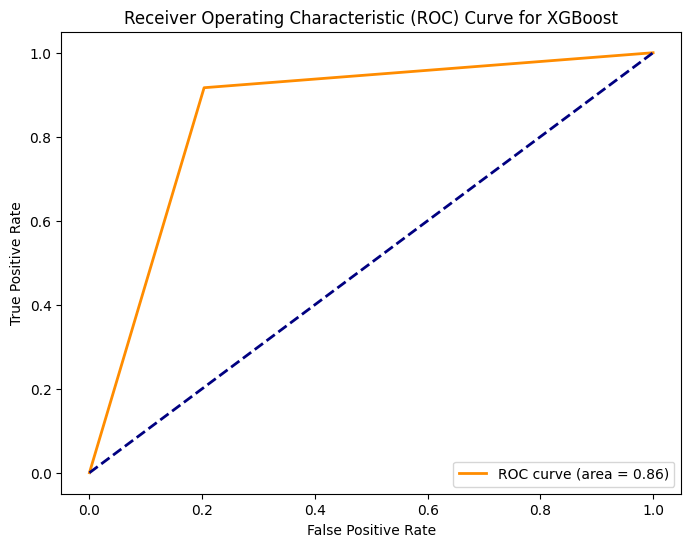

In [168]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you already have your feature matrix X and target variable y

# Split the data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train_xgb, y_train_xgb)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test_xgb)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.2f}")

cm_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print('XGBoost Confusion Matrix:')
print(cm_xgb)

# Plot Confusion Matrix for XGBoost
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_classifier.classes_)
plt.figure(figsize=(8, 6))
disp_xgb.plot(cmap=plt.cm.Blues, values_format='d', include_values=True, xticks_rotation='horizontal')
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_xgb, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


**SVM**

Accuracy: 0.79
SVM Confusion Matrix:
[[47 12]
 [16 56]]


<Figure size 800x600 with 0 Axes>

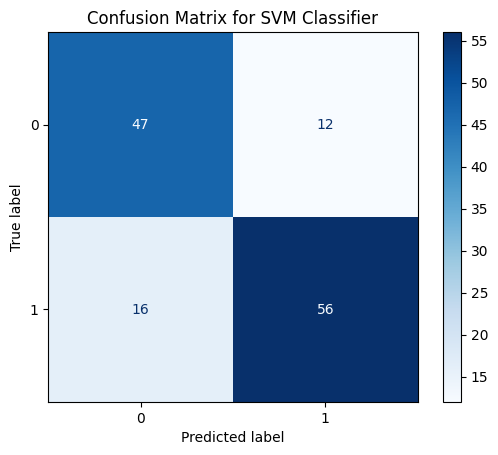

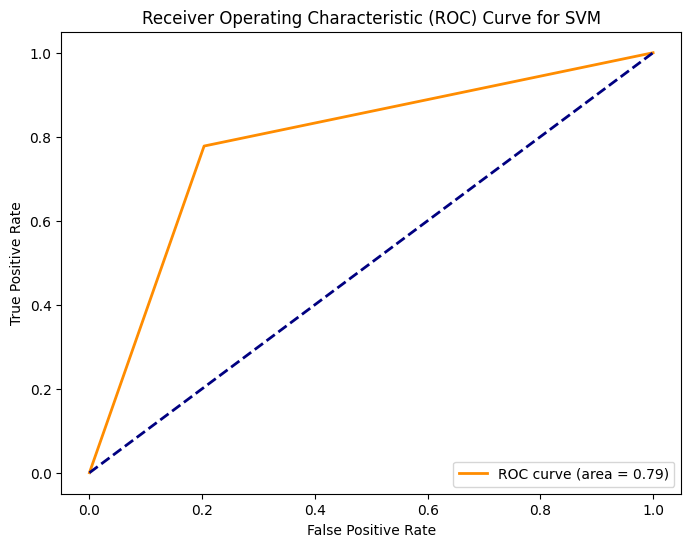

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you already have your feature matrix X and target variable y

# Split the data into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train_svm, y_train_svm)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_svm)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
print('SVM Confusion Matrix:')
print(cm_svm)

# Plot Confusion Matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
plt.figure(figsize=(8, 6))
disp_svm.plot(cmap=plt.cm.Blues, values_format='d', include_values=True, xticks_rotation='horizontal')
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

# Calculate ROC curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_svm, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()


# NAIVE BAYES

Accuracy: 0.79
Naive Bayes Confusion Matrix:
[[37 22]
 [ 6 66]]


<Figure size 800x600 with 0 Axes>

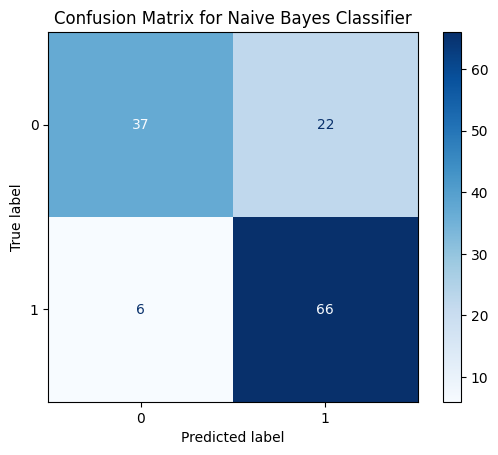

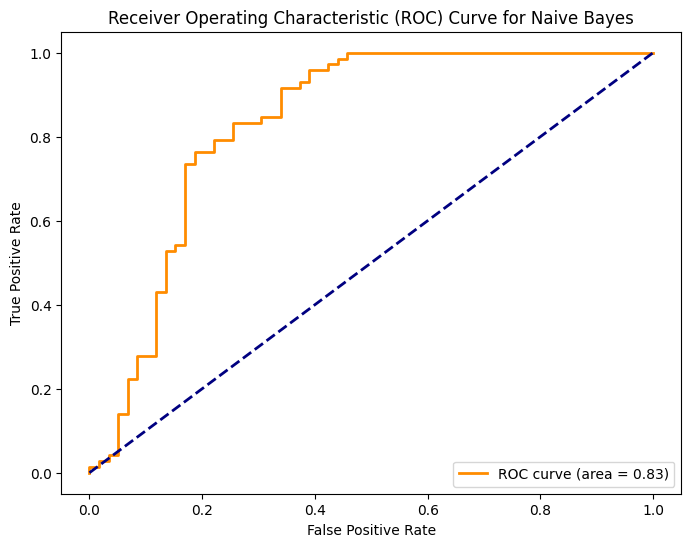

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you already have your feature matrix X and target variable y

# Split the data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train_nb, y_train_nb)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_nb)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f"Accuracy: {accuracy_nb:.2f}")

cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
print('Naive Bayes Confusion Matrix:')
print(cm_nb)

# Plot Confusion Matrix for Naive Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
plt.figure(figsize=(8, 6))
disp_nb.plot(cmap=plt.cm.Blues, values_format='d', include_values=True, xticks_rotation='horizontal')
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

# Calculate ROC curve and AUC using decision_function
y_pred_nb = nb_classifier.predict_proba(X_test_nb)[:, 1]  # Using the positive class probability as decision pred

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_nb, y_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()


# COMPARISION

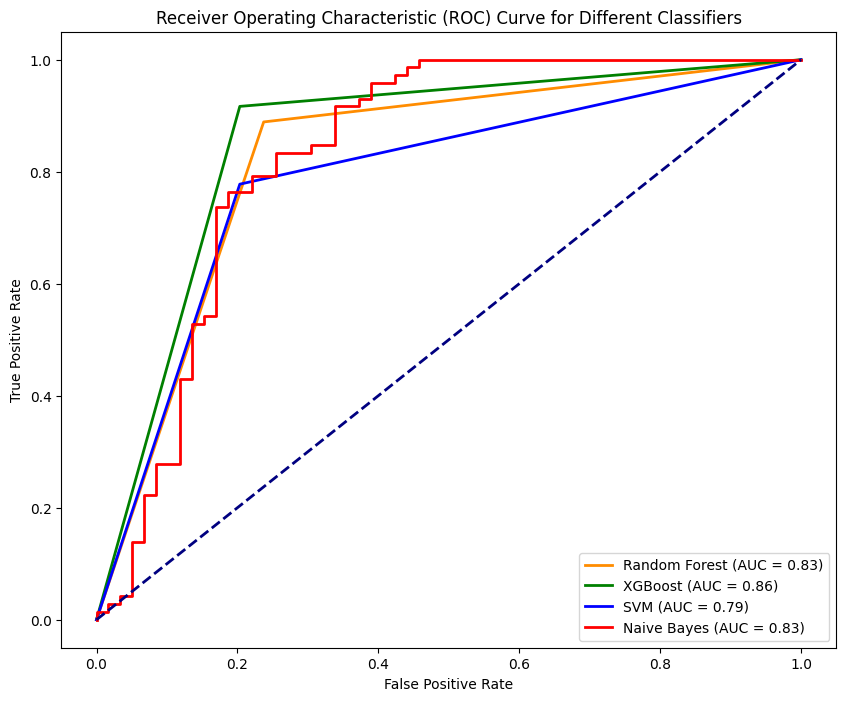

In [180]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Different Classifiers')
plt.legend(loc='lower right')
plt.show()

In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (model training and predictions)



# ... (model training and predictions)

# Metrics for Random Forest
metrics_rf = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]

# Metrics for XGBoost
metrics_xgb = [accuracy_score(y_test_xgb, y_pred_xgb), precision_score(y_test_xgb, y_pred_xgb), recall_score(y_test_xgb, y_pred_xgb), f1_score(y_test_xgb, y_pred_xgb)]

# Metrics for SVM
metrics_svm = [accuracy_score(y_test_svm, y_pred_svm), precision_score(y_test_svm, y_pred_svm), recall_score(y_test_svm, y_pred_svm), f1_score(y_test_svm, y_pred_svm)]

# Metrics for Naive Bayes
metrics_nb = [accuracy_score(y_test_nb, y_pred_nb), precision_score(y_test_nb, y_pred_nb), recall_score(y_test_nb, y_pred_nb), f1_score(y_test_nb, y_pred_nb)]

# Plot bar chart
plt.figure(figsize=(14, 8))

bar_width = 0.2
index = range(len(metrics))

plt.bar(index, metrics_rf, width=bar_width, color='darkorange', label='Random Forest')
plt.bar([i + bar_width for i in index], metrics_xgb, width=bar_width, color='green', label='XGBoost')
plt.bar([i + 2 * bar_width for i in index], metrics_svm, width=bar_width, color='blue', label='SVM')
plt.bar([i + 3 * bar_width for i in index], metrics_nb, width=bar_width, color='red', label='Naive Bayes')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Model Metrics')
plt.xticks([i + 1.5 * bar_width for i in index], metrics)
plt.legend(loc='lower right')
plt.show()


ValueError: Classification metrics can't handle a mix of binary and continuous targets

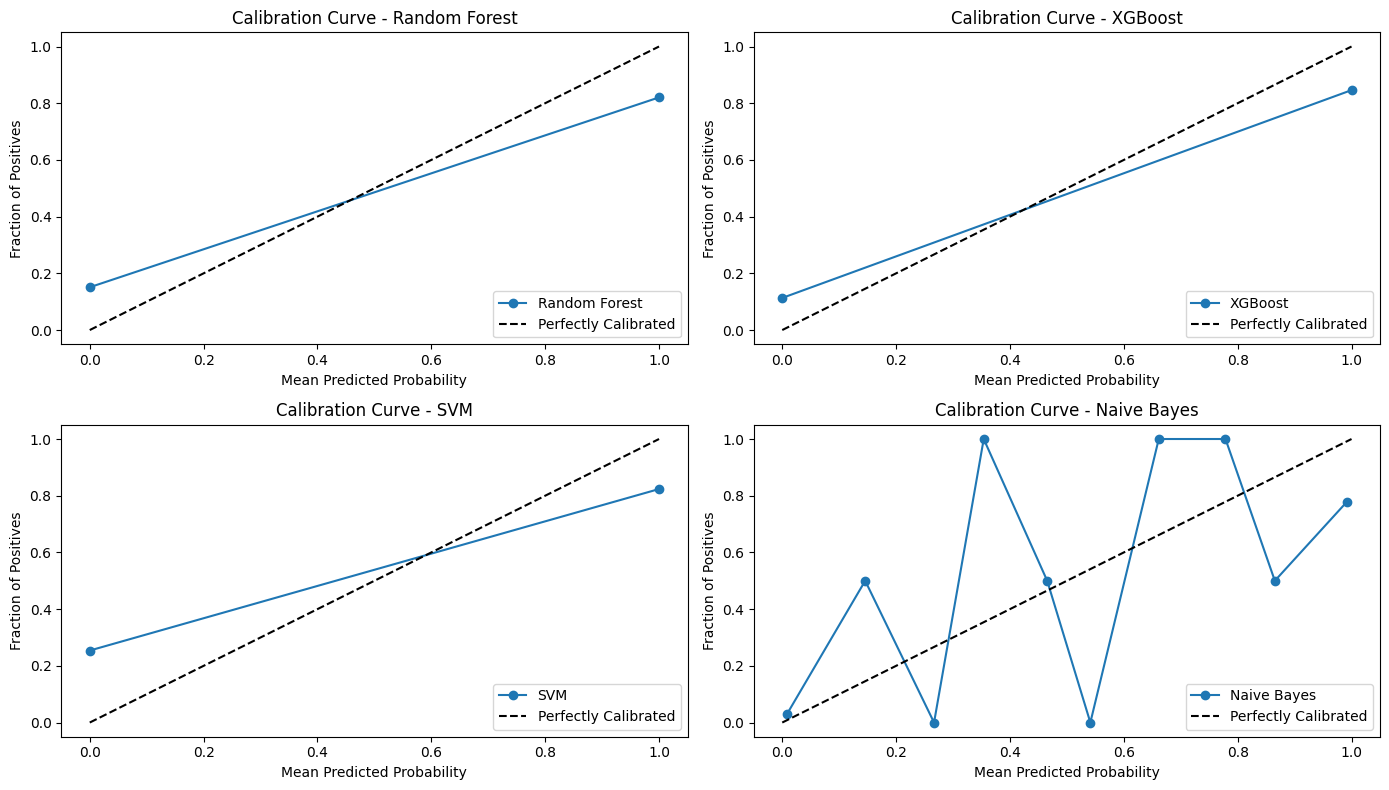

In [178]:
from sklearn.calibration import calibration_curve

# Assuming you have trained the models and obtained y_pred_rf, y_pred_xgb, y_pred_svm, y_pred_nb

# Calibration Curve for Random Forest
prob_true_rf, prob_pred_rf = calibration_curve(y_test, y_pred_rf, n_bins=10)

# Calibration Curve for XGBoost
prob_true_xgb, prob_pred_xgb = calibration_curve(y_test_xgb, y_pred_xgb, n_bins=10)

# Calibration Curve for SVM
prob_true_svm, prob_pred_svm = calibration_curve(y_test_svm, y_pred_svm, n_bins=10)

# Calibration Curve for Naive Bayes
prob_true_nb, prob_pred_nb = calibration_curve(y_test_nb, y_pred_nb, n_bins=10)

# Plot Calibration Curves
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(prob_pred_rf, prob_true_rf, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfectly Calibrated')
plt.title('Calibration Curve - Random Forest')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(prob_pred_xgb, prob_true_xgb, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfectly Calibrated')
plt.title('Calibration Curve - XGBoost')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
plt.plot(prob_pred_svm, prob_true_svm, marker='o', label='SVM')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfectly Calibrated')
plt.title('Calibration Curve - SVM')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
plt.plot(prob_pred_nb, prob_true_nb, marker='o', label='Naive Bayes')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfectly Calibrated')
plt.title('Calibration Curve - Naive Bayes')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
